<a href="https://colab.research.google.com/github/Nawshin-25/Saint_Martin/blob/main/CF(Sediment).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pandas as pd
import seaborn as sns

In [ ]:
file_name = '/content/drive/MyDrive/Data/Heavy Metals Saint Martin.xlsx'
excel_file = pd.ExcelFile(file_name)
sediment_df = pd.read_excel(file_name, sheet_name='CF (SED)')
sediment_df_cleaned = sediment_df.dropna()
# Fix malformed numbers
sediment_df_cleaned.replace('-0.263333333', '-0.263333', inplace=True)  # Replace specific malformed value
sediment_df_cleaned.replace(to_replace=r'^-\.', value='-0.', regex=True, inplace=True)  # General fix for such patterns

# Convert columns to numeric
sediment_df_cleaned.iloc[:, 1:] = sediment_df_cleaned.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Melt the DataFrame to long format for seaborn
sediment_df_melted = sediment_df_cleaned.melt(id_vars='Element Name', var_name='Station', value_name='Cf')

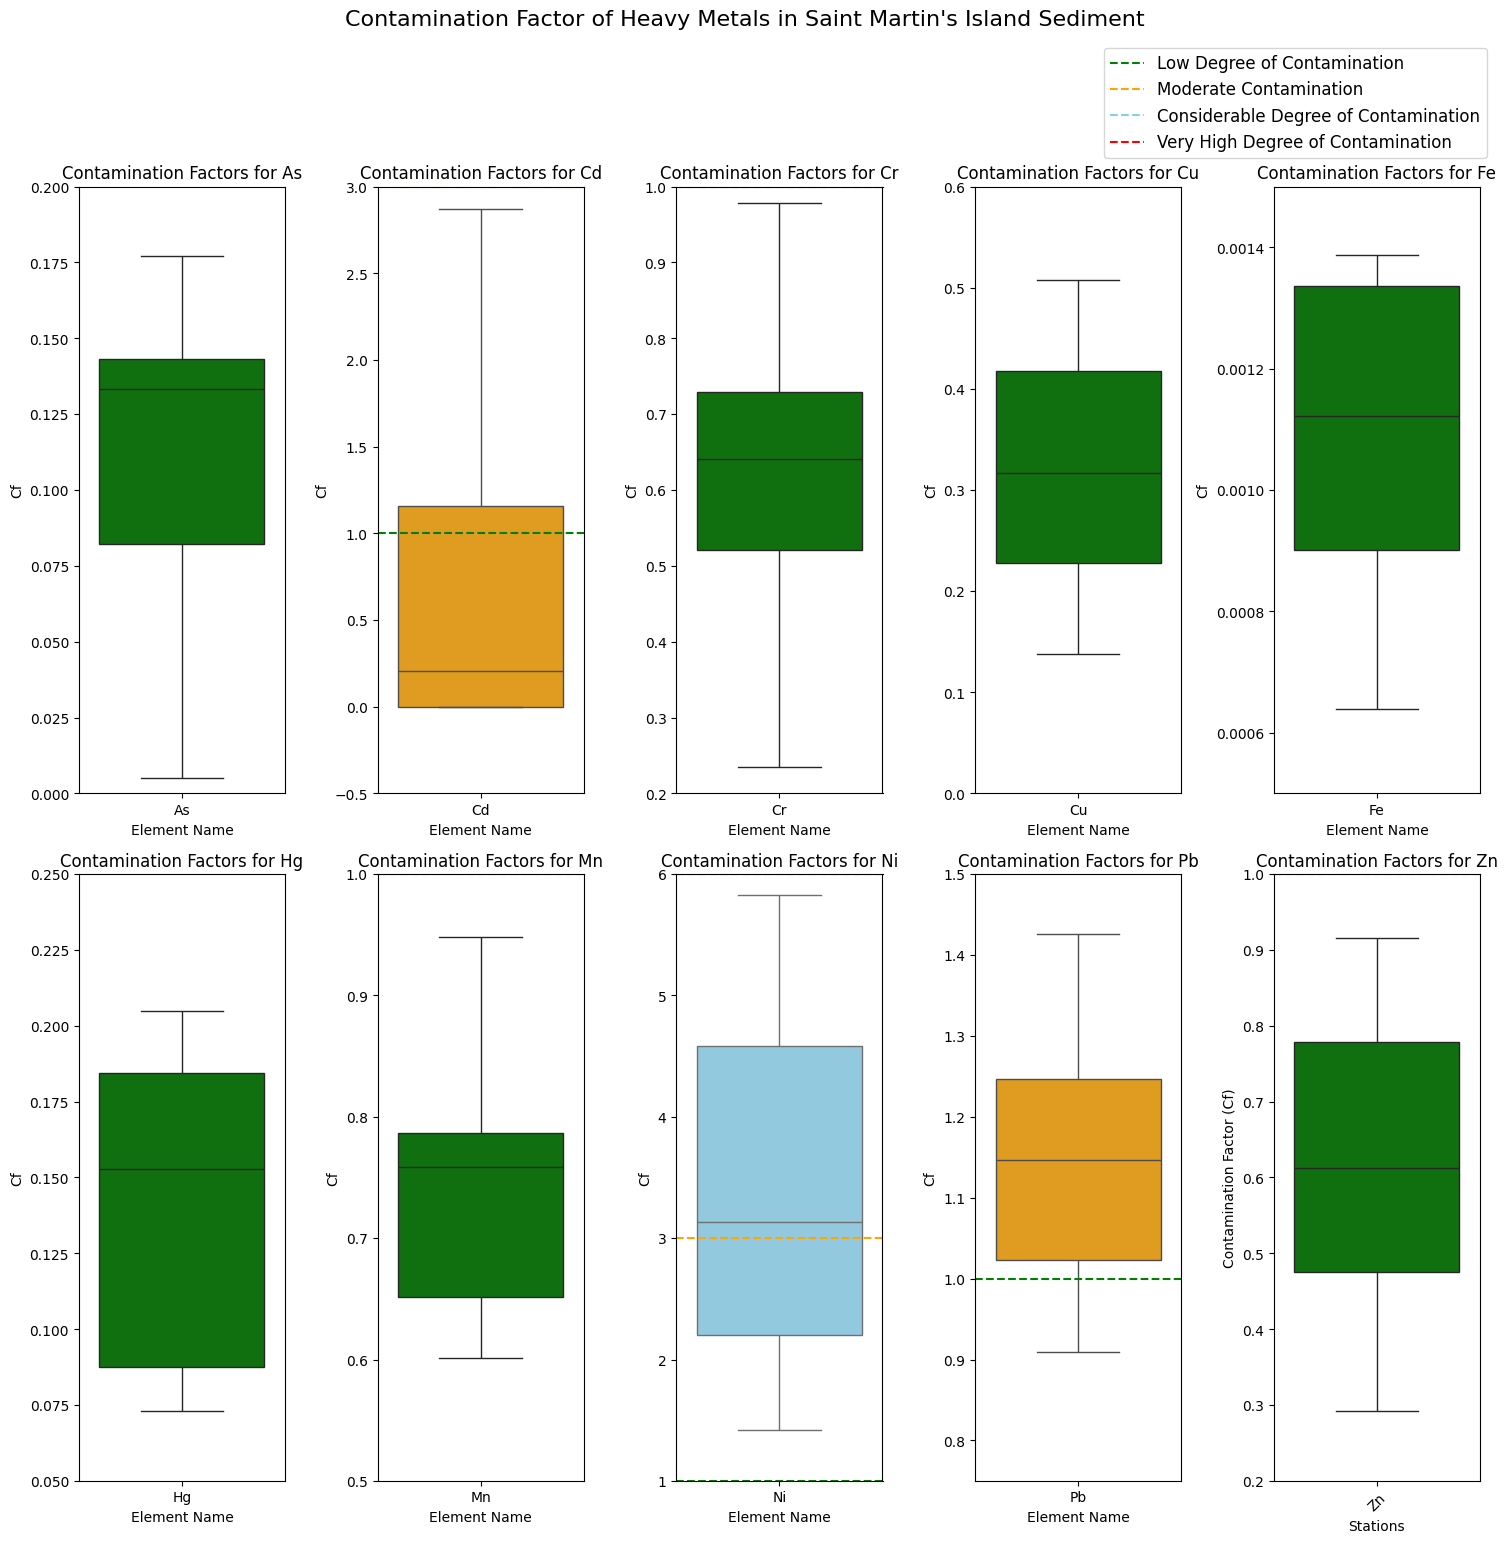

In [ ]:
# Define the color function for contamination categories
def get_color(c):
    if c < 1:
        return 'green'  # Low Degree of Contamination
    elif 1 <= c < 3:
        return 'orange'  # Moderate Contamination
    elif 3 <= c < 6:
        return 'skyblue'  # Considerable Degree of Contamination
    else:
        return 'red'  # Very High Degree of Contamination

num_elements = sediment_df_cleaned['Element Name'].nunique()
num_rows = 2
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

y_limits = {
    'As': [0.00, 0.20],
    'Pb': [0.75, 1.50],
    'Hg': [0.05, 0.25],
    'Fe': [0.00050, 0.00150],
    'Cd': [-0.5, 3],
    'Mn': [0.5, 1],
    'Cu': [0, 0.6],
    'Zn': [0.2, 1],
    'Cr': [0.2, 1],
    'Ni': [1, 6]
}

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Create a boxplot for each element in a separate subplot
for ax, (element_name, group) in zip(axes, sediment_df_melted.groupby('Element Name')):
    color = get_color(group['Cf'].mean())  # Use average to determine color
    sns.boxplot(x='Element Name', y='Cf', data=group, ax=ax, color=color)
    ax.set_ylim(y_limits[element_name])  # Set individual y-axis limits
    ax.set_title(f'Contamination Factors for {element_name}')
    ax.axhline(y=1, color='green', linestyle='--', label='Low Degree of Contamination')
    ax.axhline(y=3, color='orange', linestyle='--', label='Moderate Contamination')
    ax.axhline(y=6, color='skyblue', linestyle='--', label='Considerable Degree of Contamination')
    ax.axhline(y=6, color='red', linestyle='--', label='Very High Degree of Contamination')


# Hide any unused axes
for i in range(num_elements, len(axes)):
    fig.delaxes(axes[i])

handles, labels = ax.get_legend_handles_labels()  # Get handles and labels from the last axis
fig.legend(handles, labels, loc='upper right', fontsize='large', bbox_to_anchor=(1, 0.9999))  # Adjust y-position
fig.suptitle("Contamination Factor of Heavy Metals in Saint Martin's Island Sediment", fontsize=16, ha='center', y=1.02)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the title
plt.xticks(rotation=45)
plt.xlabel('Stations')
plt.ylabel('Contamination Factor (Cf)')
plt.show()